<a href="https://colab.research.google.com/github/CleresMarcel/Computer_vision/blob/main/metric_learning_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse trabalho tem um agradecimento a empresa Daedalus, apenas conheci essa tecnica graças a eles !!


# Metric Learning

##Fluxo Completo

###Preparação dos Dados:

O SiameseMNISTDataset cria pares de imagens e rótulos.

O DataLoader carrega esses pares em lotes.

Forward Pass no Modelo:

  Para cada par de imagens em um lote, o modelo gera embeddings (output1 e output2).

Cálculo da Perda:
A função ContrastiveLoss usa esses embeddings e os rótulos para calcular a perda.

Backpropagation:

A perda é usada para calcular os gradientes e atualizar os pesos do modelo.
Esse processo é repetido em cada iteração do treinamento, permitindo que o modelo aprenda a gerar embeddings que sejam úteis para distinguir entre classes com base na função de perda contrastiva.




https://towardsdatascience.com/the-why-and-the-how-of-deep-metric-learning-e70e16e199c0

## Bloco Convolucional 1:

Primeira camada convolucional: 10 filtros.

Segunda camada convolucional: 10 filtros.

MaxPool2D com kernel de 2.

## Bloco Convolucional 2:

Primeira camada convolucional: 10 filtros.

Segunda camada convolucional: 10 filtros.

MaxPool2D com kernel de 2.

## Camada de Embedding:

Camada totalmente conectada (Linear) que reduz os dados a um vetor de características (embedding_dim).


## Bloco convolucional1:
nn.Conv2d cria uma camada convolucional com input_shape canais de entrada e hidden_units (10) filtros (ou canais) de saída.

Após a primeira camada convolucional, você aplica uma função de ativação ReLU.

A segunda camada convolucional também tem hidden_units (10) filtros de saída.

Outra função de ativação ReLU.

MaxPool2d reduz a dimensão espacial (altura e largura) pela metade.

## Bloco2:

Similar ao primeiro bloco, mas a entrada para a primeira camada convolucional neste bloco são os hidden_units (10) filtros de saída do bloco anterior.

## Camada de classificação:

nn.Flatten transforma a saída 4D (batch_size, canais, altura, largura) das camadas convolucionais em uma forma 2D (batch_size, número de elementos).

nn.Linear aplica uma transformação linear à entrada, mapeando a saída dos convolucionais para um vetor de dimensão embedding_dim (128).

## Dimensionamento das Saídas.

A primeira camada convolucional em cada bloco possui 10 filtros, e a segunda camada também possui 10 filtros. Isso significa que, para cada imagem de entrada, você tem duas camadas de convolução em cada bloco, cada uma com 10 filtros, mas essas camadas estão conectadas em série, não em paralelo.

Portanto, a rede convolucional em si tem dois blocos de camadas convolucionais, onde cada camada nesses blocos tem 10 filtros.

A saída final da rede antes da camada totalmente conectada é um tensor com a forma (batch_size, 10, 7, 7) após passar pelos dois blocos convolucionais e MaxPool. Este tensor é então achatado e mapeado para um vetor de 128 dimensões pela camada nn.Linear.

## Resumo:

Bloco Convolucional 1 e 2: Cada um possui duas camadas convolucionais com 10 filtros.

Camada de Classificação: Mapeia a saída dos blocos convolucionais para um vetor de 128 dimensões.

Resumindo: dois blocos de camadas convolucionais, cada bloco contendo camadas convolucionais de 10 filtros ou neuronios.






Criei minha rede principal, em seguida defini o foward pass dessa rede principal.

Em seguida eu adicionei o metric learning, basicamente o metric learning utiliza um margin, uma distancia eucliadiana e um loss para comparar a distancia entre as imagens.
Eu preciso de 2 imagens, e o label para comparar se o par é positivo ou negativo.

O margin para poder avaliar o quão longe os pares estão, em seguida eu meço o loss disso com base em uma distancia euclidiana que utiliza esse margin. Sendo que o margin já divide entre casos de pares negativos e positivos.

Em seguida eu fiz uma classe siamesa, nessa classe siamesa eu passei meu dataset, utilizei o metodo getiten para poder de fato pegar um par de imagens aleatorias e depois verificar se elas possuem ou não a mesma label, o retorno disso eu obtenho as 2 imagens Já convertidas em um float 32, ao mesmo tempo que eu também já sei dizer se os labels forem diferentes. No caso ele vai retornar True (1) que é um par negativo, Se retornar 0 (False) vai ser um par positivo, depois converte o rotulo para um tensor float 32 como eu disse.
Esse retorno com imagens e label no formato de tensor, que vão alimentar minha rede siamesa.


Criada as funções eu inicializei meu dataset.

Transformo pra tensor. Faço a separação entre treino e teste do meu dataset já em tensor. Jogo meus dados de train e teste para minha rede siamesa de comparação. Obtendo meu train e test siamese dataset.

Eu preciso fazer a separação de pares tanto para train quanto para teste.

Em seguida, ele vai passar pela minha rede siamesa, fazer toda identificação de pares, e retornar o par e a classe no formato float 32.

Pego esses dados e transformo em train e test dataloaders siameses.

Tento rodar em gpu.

inicio meu modelo de rede principal (fashionmnist) só informando que o input_shape é 1, pois são imagens com apenas 1 canal de cor.
Esse modelo principal vai me retornar todo o resultado que já estará no formato de vetor de caracteristicas (embedding). Ele que vai servir para comparar as similaridades.

Eu preciso já saber de antemão qual será o tamanho do meu vetor de caracteristicas, e isso pode ser feito avaliando as camadas com aquela estrategia de print. ou com aquela outra estrategia.

inicio o modelo, informo a função responsavel pela perda, também o optimizer.
Eu tenho os passos definidos, mas eu não tenho um loop de treino definido, para isso é feito as funções train metric learning step e test metric learning step
Em seguida eu devino por quantas epocas esse treino vai acontecer, ta feito. a rede.

Em seguida foi feito funções para plotar esses embedings e mostrar quantos são de classe 0 e quantos são de classe 1.

Também foi feito uma gambiarra para mostrar quais os embeddings com base nas suas classes, de forma a tentar identificar algum padrão.





In [44]:
import torch
from torch import nn

import torchvision

from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


2.3.0+cu121
0.18.0+cu121


In [45]:
#ADQUIRINDO MEU DATASET

from torchvision import datasets
#basta seguir a documentação.
train_data = datasets.FashionMNIST(
    root = "data",
    train = True, #we want the training dataset, not the test
    download = True,
    transform = torchvision.transforms.ToTensor(), # como transformar os dados
    target_transform = None # we dont want to transform the labels
)

test_data = datasets.FashionMNIST(
    root= "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform=None
)

#pytroch comes with a tqm module

In [46]:
len(train_data), len(test_data)

(60000, 10000)

In [47]:
#training exemple

image, label = train_data[0]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [48]:
 label

9

In [49]:
class_names = train_data.classes
class_names
#len(class_names)

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [50]:
class_to_idx = train_data.class_to_idx
class_to_idx


{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [51]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [52]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [53]:
image.shape, label


(torch.Size([1, 28, 28]), 9)

In [54]:
print(f"Image shape: {image.shape} -> [color chanels, height, width]")
print(f"image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color chanels, height, width]
image label: Ankle boot


image shape: torch.Size([1, 28, 28])


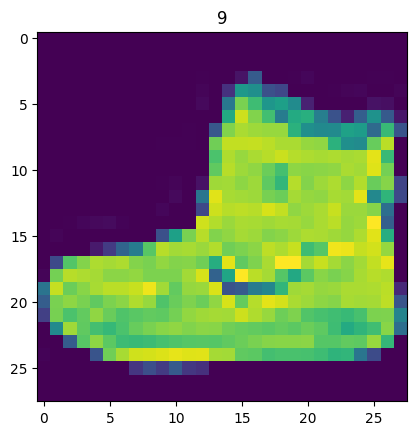

In [55]:
import matplotlib.pyplot as plt
image_label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label); # label 9

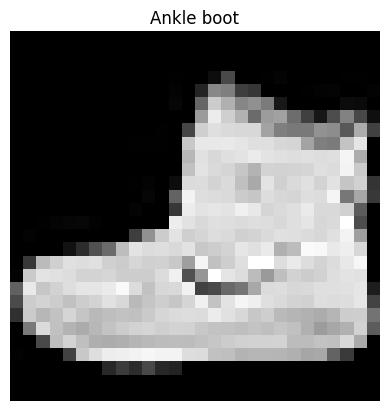

In [56]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label]);
plt.axis(False); # ; pois eu não quero ver os valores do eixo


37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


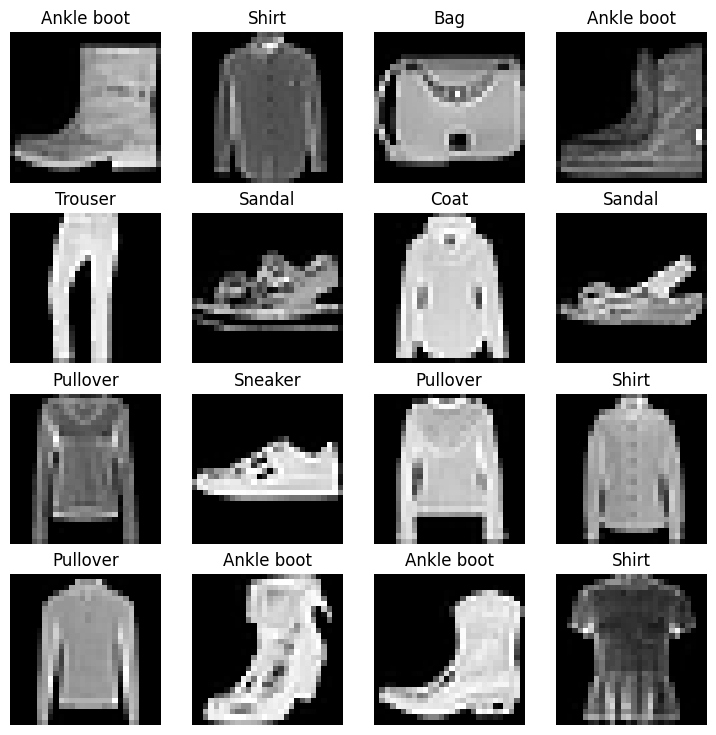

In [57]:
#showing all images
torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data), size=[1]).item()
  print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

In [58]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np
from torch.utils.data import Dataset


# Helper functions
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    acc = (correct / len(y_true)) * 100
    return acc

def print_train_time(start: float, end: float, device: torch.device = None):
    """Calculate and print the training time"""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

class FashionMNISTModelV2(nn.Module):
    """Tiny VGG modified for Metric Learning"""
    #para utilizar o metric learning, eu não preciso obter o meu shape da saida no meu init
    #já na camada de convolução eu preciso saber os meus canais de saida, nada muda
    def __init__(self, input_shape: int,
                 hidden_units: int,
                 embedding_dim: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, out_features=embedding_dim)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x



### É aqui que o metric learning acontece.

### Eu preciso adicionar uma constratisteve loss,

Margin:
define um limite ou uma margem que é usada para calcular a penalização das distâncias entre pares de amostras. Ele é essencial para a definição da função de perda contrastiva, que é utilizada em tarefas de aprendizado de métrica, como em redes siamesas para tarefas de verificação e reconhecimento.



O valor da margin é então usado no cálculo da perda no método forward:

A perda contrastiva tem dois componentes principais:

Quando label é 0 (pares negativos):

Para pares negativos (onde label é 0), a perda incentiva que a distância euclidiana entre os pares seja grande. Nesse caso, a contribuição para a perda é o quadrado da distância euclidiana entre output1 e output2.

Quando label é 1 (pares positivos):

Para pares positivos (onde label é 1), a perda incentiva que a distância euclidiana seja pequena e menor que a margin. Se a distância for maior que a margin, a perda será zero, mas se for menor, a perda será o quadrado da diferença entre a margin e a distância euclidiana, assegurando que a rede aprenda a aproximar mais os pares positivos.




O Significado Prático da margin.

Separação entre Pares: A margin define quão separados os pares negativos devem ser dos pares positivos. Uma margem maior significa que os pares negativos devem estar ainda mais distantes dos pares positivos.

Pares Positivos: Dois exemplos (imagens) pertencentes à mesma classe.
Pares Negativos: Dois exemplos (imagens) pertencentes a classes diferentes.


Flexibilidade no Aprendizado: Um valor adequado para a margin pode ajudar a rede a aprender uma representação mais discriminativa. Se a margem for muito pequena, pode não haver penalidade suficiente para pares negativos, resultando em uma rede que não aprende bem a separação. Se for muito grande, pode levar a um excesso de penalidade e dificultar a convergência.

Escolha do Valor da margin:
Teste varios valores

Em resumo, a margin é um hiperparâmetro crucial na função de perda contrastiva, influenciando diretamente como a rede aprende a discriminar entre pares positivos e negativos.

O objetivo do metric learning é aprender uma função de embedding que:

Coloque pares positivos próximos no espaço de embedding.

Coloque pares negativos distantes no espaço de embedding.

Para pares positivos (label é 0), o termo (1 - label) * torch.pow(euclidean_distance, 2) é minimizado, incentivando a distância a ser zero.

Para pares negativos (label é 1), o termo label * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2) é minimizado, incentivando a distância a ser maior que a margin.


Uma pergunta interessante é: quando eu chamar minha classe contrastiveLoss, de onde vem meus output1, output2 e label ??

In [59]:
#é aqui que o metric learning acontece. Eu preciso adicionar uma constratisteve loss,
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super().__init__()
        #super(ContrastiveLoss, self).__init__() #é também uma forma arcaica de fazer a função herdar tudo do nn.module, a classe pai
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = nn.functional.pairwise_distance(output1, output2)
        loss = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                          label * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss



img1 e img2 são as duas imagens do par carregadas pelo DataLoader.

output1 e output2 são as saídas da rede para essas imagens.

label é o rótulo binário indicando se as imagens são da mesma classe ou não.

A função de perda ContrastiveLoss então calcula a perda com base nas distâncias entre output1 e output2, ajustando os pesos do modelo para minimizar essa perda

In [60]:
#Eu preciso definir as 2 imagens que vão ser comparadas, é isso ???

class SiameseMNISTDataset(Dataset):
    def __init__(self, mnist_dataset):
        self.mnist_dataset = mnist_dataset

    def __getitem__(self, index):
        img1, label1 = self.mnist_dataset[index]
        should_get_same_class = np.random.randint(0, 2) # Randomly decide if the pair should be of the same class
        if should_get_same_class:
            while True:
                index2 = np.random.randint(0, len(self.mnist_dataset))
                img2, label2 = self.mnist_dataset[index2]
                if label1 == label2:
                    break # Ensure img2 is of the same class as img1
        else:
            while True:
                index2 = np.random.randint(0, len(self.mnist_dataset))
                img2, label2 = self.mnist_dataset[index2]
                if label1 != label2:
                    break # Ensure img2 is of a different class than img1
        return (img1, img2), torch.from_numpy(np.array([int(label1 != label2)], dtype=np.float32)) # se os labels forem diferentes, vai retornar True (1) que é um par negativo, Se retornar 0 (False) vai ser um par positivo, depois converte o rotulo para um tensor float 32
#ele retorna imag1, img2 que é o que vai alimentar a rede siamesa.
    def __len__(self):
        return len(self.mnist_dataset)



Transformo pra tensor

Faço a separação entre treino e teste do meu dataset já em tensor.

Jogo meus dados de train e teste para minha rede siamesa de comparação. obtendo meu train e test siamese dataset

Pego esses dados e transformo em train e test dataloaders siameses

inicio meu modelo sem dado nenhum a principio.
Mas para rodar o treino devido, vou passar esses train e test dataloaders siameses

na minha rede principal eu também preciso informar a dimensao dos embedings

In [61]:
transform = transforms.Compose([transforms.ToTensor()])

train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

train_siamese_dataset = SiameseMNISTDataset(train_data)
test_siamese_dataset = SiameseMNISTDataset(test_data)

BATCH_SIZE = 32

train_siamese_loader = DataLoader(train_siamese_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_siamese_loader = DataLoader(test_siamese_dataset, batch_size=BATCH_SIZE, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FashionMNISTModelV2(input_shape=1, hidden_units=10, embedding_dim=128).to(device)
loss_fn = ContrastiveLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



Eu tenho minhas 2 redes prontas, separei o dataset.
Falta falar como meu treino vai acontcer. no treino da rede siamesa já acontece minha comparação.
então no meu treino eu só preciso verificar os erros obtidos, qual a label.
Eu também preciso passar 2 imagens para o modelo, 1 de cada vez


In [62]:
def train_metric_learning_step(model, data_loader, loss_fn, optimizer, device):
    model.train()
    train_loss = 0

    for batch_idx, (data, target) in enumerate(data_loader):
        img1, img2 = data[0].to(device), data[1].to(device)
        label = target.to(device)

        optimizer.zero_grad()
        output1 = model(img1)
        output2 = model(img2)
        loss = loss_fn(output1, output2, label)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(data_loader)
    print(f'Train Loss: {train_loss:.6f}')

def test_metric_learning_step(model, data_loader, loss_fn, device):
    model.eval()
    test_loss = 0

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(data_loader):
            img1, img2 = data[0].to(device), data[1].to(device)
            label = target.to(device)

            output1 = model(img1)
            output2 = model(img2)
            loss = loss_fn(output1, output2, label)
            test_loss += loss.item()

    test_loss /= len(data_loader)
    return print(f'Test Loss: {test_loss:.6f}')




In [63]:
# Train and test model
epochs = 1
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    train_metric_learning_step(model, train_siamese_loader, loss_fn, optimizer, device)
    test_metric_learning_step(model, test_siamese_loader, loss_fn, device)

Epoch 1/1
Train Loss: 0.260817
Test Loss: 0.254160


In [66]:
#7.4 Use torchinfo to get an idea of the shapes going through our model -> THIS IS A ABSOLUTE HANDY
# Install torchinfo, import if it's available
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model, input_size=[1, 1, 28, 28]) #eu passo o tamanhoo tensor de input, da transform.Compose

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTModelV2                      [1, 128]                  --
├─Sequential: 1-1                        [1, 10, 14, 14]           --
│    └─Conv2d: 2-1                       [1, 10, 28, 28]           100
│    └─ReLU: 2-2                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-3                       [1, 10, 28, 28]           910
│    └─ReLU: 2-4                         [1, 10, 28, 28]           --
│    └─MaxPool2d: 2-5                    [1, 10, 14, 14]           --
├─Sequential: 1-2                        [1, 10, 7, 7]             --
│    └─Conv2d: 2-6                       [1, 10, 14, 14]           910
│    └─ReLU: 2-7                         [1, 10, 14, 14]           --
│    └─Conv2d: 2-8                       [1, 10, 14, 14]           910
│    └─ReLU: 2-9                         [1, 10, 14, 14]           --
│    └─MaxPool2d: 2-10                   [1, 10, 7, 7]             --
├─Sequentia

[1, 128] é o meu vetor de embedding, meu vetor de caracteristicas !!!

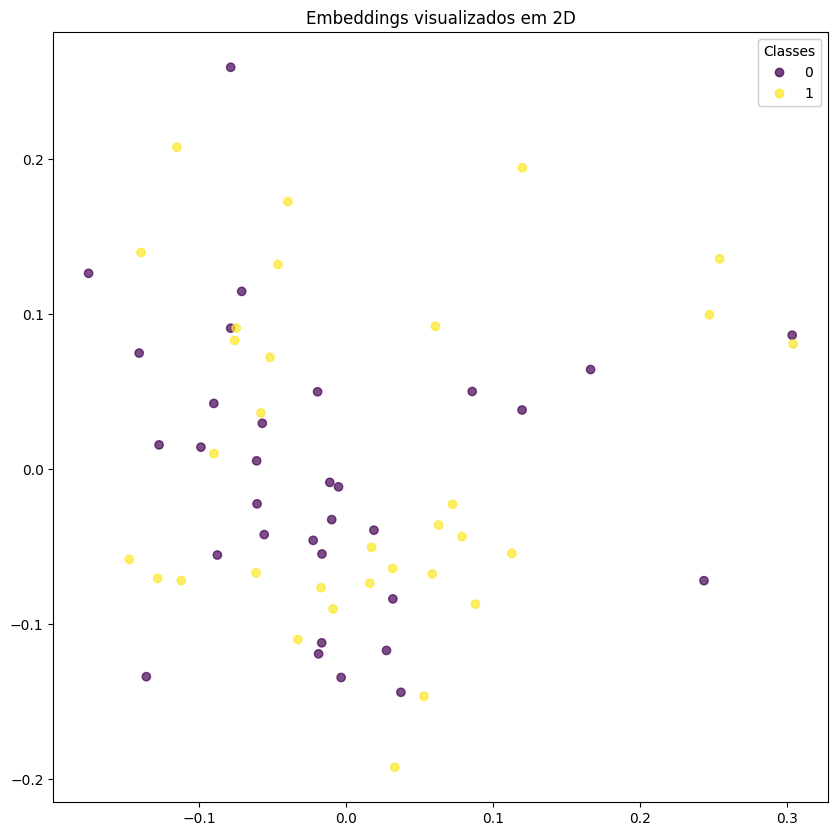

In [67]:
# Obter um lote de imagens do conjunto de dados de teste
data_iter = iter(test_siamese_loader)
data, labels = next(data_iter)
img1, img2 = data[0].to(device), data[1].to(device)

# Passar as imagens pela rede para obter os embeddings
model.eval()
with torch.no_grad():
    embeddings1 = model(img1)
    embeddings2 = model(img2)

# Converter os embeddings para numpy para visualização
embeddings1_np = embeddings1.cpu().numpy()
embeddings2_np = embeddings2.cpu().numpy()

# Concatenar os embeddings das duas imagens para visualização
all_embeddings = np.concatenate((embeddings1_np, embeddings2_np), axis=0)
# Criar rótulos binários para os embeddings (0 para img1, 1 para img2)
all_labels = np.concatenate((np.zeros(len(embeddings1_np)), np.ones(len(embeddings2_np))), axis=0)


from sklearn.decomposition import PCA

# Reduzir os embeddings para 2D usando PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(all_embeddings)

import matplotlib.pyplot as plt

# Função para plotar os embeddings em 2D
def plot_embeddings(embeddings, labels):
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='viridis', alpha=0.7)
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    ax = plt.gca()  # Obter o objeto Axes atual
    ax.add_artist(legend1)  # Adicionar a legenda ao objeto Axes
    plt.title('Embeddings visualizados em 2D')
    plt.show()

# Plotar os embeddings em 2D
plot_embeddings(embeddings_2d, all_labels)




In [68]:
import numpy as np

# Salvar os embeddings em um arquivo numpy
np.save('embeddings_2d.npy', embeddings_2d)

# Salvar as classes correspondentes (0 ou 1) em um arquivo numpy
np.save('all_labels.npy', all_labels)

# Salvar as labels originais do FashionMNIST em um arquivo numpy
np.save('original_labels.npy', labels)


In [69]:
# Carregar os embeddings reduzidos
embeddings_2d_loaded = np.load('embeddings_2d.npy')

# Carregar as classes correspondentes
all_labels_loaded = np.load('all_labels.npy')

# Carregar as labels originais do FashionMNIST
original_labels_loaded = np.load('original_labels.npy')


In [70]:
print('Embeddings 2D shape:', embeddings_2d_loaded.shape)
print('All labels shape:', all_labels_loaded.shape)
print('Original labels shape:', original_labels_loaded.shape)



Embeddings 2D shape: (64, 2)
All labels shape: (64,)
Original labels shape: (32, 1)


In [71]:
first_embedding = embeddings_2d_loaded[9]
print('Primeiro embedding:')
print(first_embedding)
first_label = all_labels_loaded[9]
print('Primeiro label correspondente:')
print(first_label)

# Acessar o primeiro original label do FashionMNIST
first_original_label = original_labels_loaded[9]
print('Primeiro original label do FashionMNIST:')
print(first_original_label)


Primeiro embedding:
[-0.01665946 -0.1119358 ]
Primeiro label correspondente:
0.0
Primeiro original label do FashionMNIST:
[1.]


In [ ]:
BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB

In [72]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Função para plotar os embeddings em 2D
def plot_embeddings(embeddings, labels):
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='viridis', alpha=0.7)
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    ax = plt.gca()  # Obter o objeto Axes atual
    ax.add_artist(legend1)  # Adicionar a legenda ao objeto Axes
    plt.title('Embeddings visualizados em 2D')
    plt.show()

# Limpar listas
embeddings_list = []
labels_list = []

# Iterar sobre os dados
for idx, (data, binary_labels) in enumerate(test_siamese_loader):
    img1, img2 = data[0].to(device), data[1].to(device)
    label1, label2 = binary_labels[0].item(), binary_labels[1].item()  # Obter os valores inteiros dos rótulos binários

    # Adicionar impressões para verificar os dados
    print(f"Iteração {idx}: Rótulos binários = {binary_labels}, Labels = {label1}, {label2}")

    # Passar as imagens pela rede para obter os embeddings
    model.eval()
    with torch.no_grad():
        embeddings1 = model(img1)
        embeddings2 = model(img2)

    # Converter os embeddings para numpy
    embeddings1_np = embeddings1.cpu().numpy()
    embeddings2_np = embeddings2.cpu().numpy()

    # Adicionar embeddings e rótulos às listas
    embeddings_list.append(embeddings1_np)
    embeddings_list.append(embeddings2_np)
    labels_list.append(label1)  # Adicionar rótulo para img1
    labels_list.append(label2)  # Adicionar rótulo para img2

# Concatenar listas para formar arrays
embeddings_array = np.concatenate(embeddings_list, axis=0)
labels_array = np.array(labels_list)

# Salvar em um arquivo .npz para análise posterior
np.savez('embeddings_data.npz', embeddings=embeddings_array, labels=labels_array)

print(f"Tamanho de labels_array: {len(labels_array)}")  # Verificar o tamanho correto dos rótulos


A saída de streaming foi truncada nas últimas 5000 linhas.
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.]]), Labels = 1.0, 1.0
Iteração 157: Rótulos binários = tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.]]), Labels = 0.0, 1.0
Iteração 158: Rótulos binários = tensor([[1.],
        [0.],
        [0.],
        [1.],
        [

In [73]:
import numpy as np

# Carregar o arquivo .npz
data = np.load('embeddings_data.npz')
embeddings_array = data['embeddings']
labels_array = data['labels']

# Verificar quantos rótulos únicos existem
unique_labels = np.unique(labels_array)
print(f"Rótulos únicos: {unique_labels}, Quantidade: {len(unique_labels)}")


Rótulos únicos: [0. 1.], Quantidade: 2


In [74]:
print(f"Tamanho de embeddings_array: {len(embeddings_array)}")
print(f"Tamanho de labels_array: {len(labels_array)}")

Tamanho de embeddings_array: 20000
Tamanho de labels_array: 626


In [75]:
for i in range(10):  # Imprimir os primeiros 10 exemplos
    print(f"Embedding {i}: {embeddings_array[i]} | Rótulo: {labels_array[i]}")

Embedding 0: [ 5.22535294e-02  3.13393474e-02  4.03556041e-02  6.91455081e-02
 -7.74336532e-02 -5.54721057e-03  2.33792700e-02  4.96540777e-02
  1.24475032e-01 -6.81922734e-02  1.32662848e-01 -1.07319556e-01
  7.87284523e-02 -4.62714955e-02 -4.50851843e-02 -5.26777133e-02
  3.17752138e-02  7.95293748e-02 -4.89470959e-02 -5.33669582e-03
 -1.21342681e-01 -2.54754350e-03  7.78724924e-02 -2.67012417e-03
  1.23031892e-01 -7.04094470e-02 -4.82470989e-02 -1.15371324e-01
 -4.53029349e-02 -1.45780910e-02 -4.72407863e-02 -3.07390429e-02
 -5.58981523e-02 -2.10926402e-02 -6.59653842e-02  4.36108653e-03
  1.70278296e-01 -1.04443677e-01 -3.45841274e-02 -4.28304449e-03
 -5.87362647e-02 -6.53220564e-02 -4.29483578e-02 -1.99206918e-02
 -3.04289535e-03  1.11832820e-01  7.32512102e-02  1.25976667e-01
  4.88566458e-02 -9.14724097e-02  6.13820627e-02 -1.54962182e-01
  3.86642888e-02 -1.49924308e-04 -1.16847202e-01 -1.12767331e-01
  4.03979719e-02  8.60625133e-02  2.36743633e-02  4.57547158e-02
 -8.91073495

ValueError: 'c' argument has 626 elements, which is inconsistent with 'x' and 'y' with size 20000.

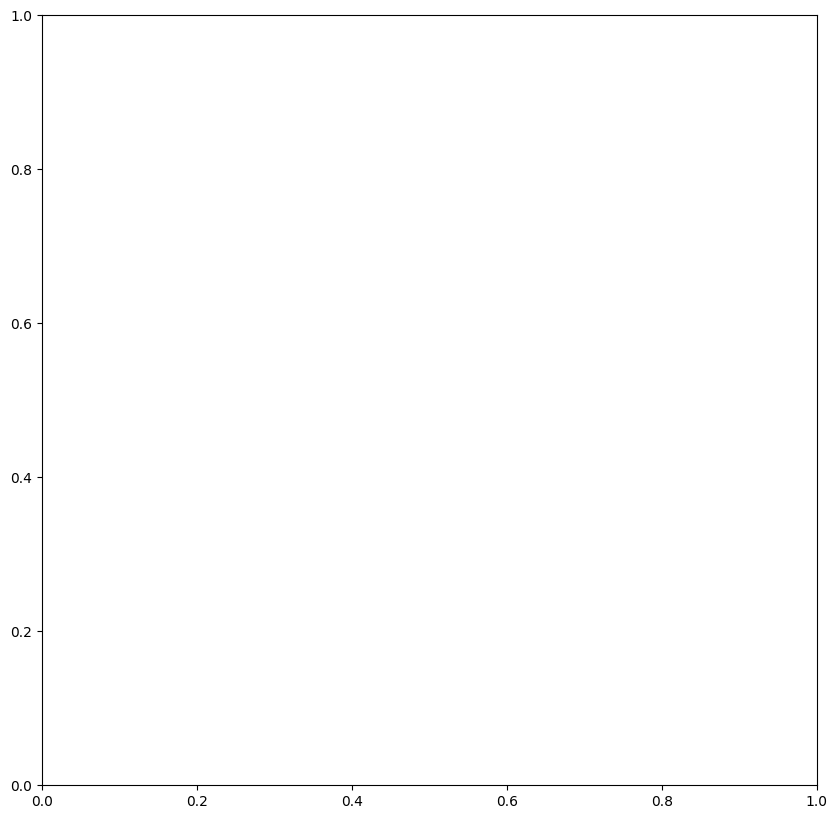

In [76]:
# Função para plotar embeddings em 2D
def plot_embeddings(embeddings, labels):
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='viridis', alpha=0.7)
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    ax = plt.gca()
    ax.add_artist(legend1)
    plt.title('Embeddings visualizados em 2D')
    plt.show()

# Reduzir embeddings para 2D usando PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_array)

# Plotar embeddings em 2D com base nos rótulos
plot_embeddings(embeddings_2d, labels_array)


In [ ]:
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

Embeddings da primeira imagem no lote:
[ 5.22535294e-02  3.13393474e-02  4.03556041e-02  6.91455081e-02
 -7.74336532e-02 -5.54721057e-03  2.33792700e-02  4.96540777e-02
  1.24475032e-01 -6.81922734e-02  1.32662848e-01 -1.07319556e-01
  7.87284523e-02 -4.62714955e-02 -4.50851843e-02 -5.26777133e-02
  3.17752138e-02  7.95293748e-02 -4.89470959e-02 -5.33669582e-03
 -1.21342681e-01 -2.54754350e-03  7.78724924e-02 -2.67012417e-03
  1.23031892e-01 -7.04094470e-02 -4.82470989e-02 -1.15371324e-01
 -4.53029349e-02 -1.45780910e-02 -4.72407863e-02 -3.07390429e-02
 -5.58981523e-02 -2.10926402e-02 -6.59653842e-02  4.36108653e-03
  1.70278296e-01 -1.04443677e-01 -3.45841274e-02 -4.28304449e-03
 -5.87362647e-02 -6.53220564e-02 -4.29483578e-02 -1.99206918e-02
 -3.04289535e-03  1.11832820e-01  7.32512102e-02  1.25976667e-01
  4.88566458e-02 -9.14724097e-02  6.13820627e-02 -1.54962182e-01
  3.86642888e-02 -1.49924308e-04 -1.16847202e-01 -1.12767331e-01
  4.03979719e-02  8.60625133e-02  2.36743633e-02  4

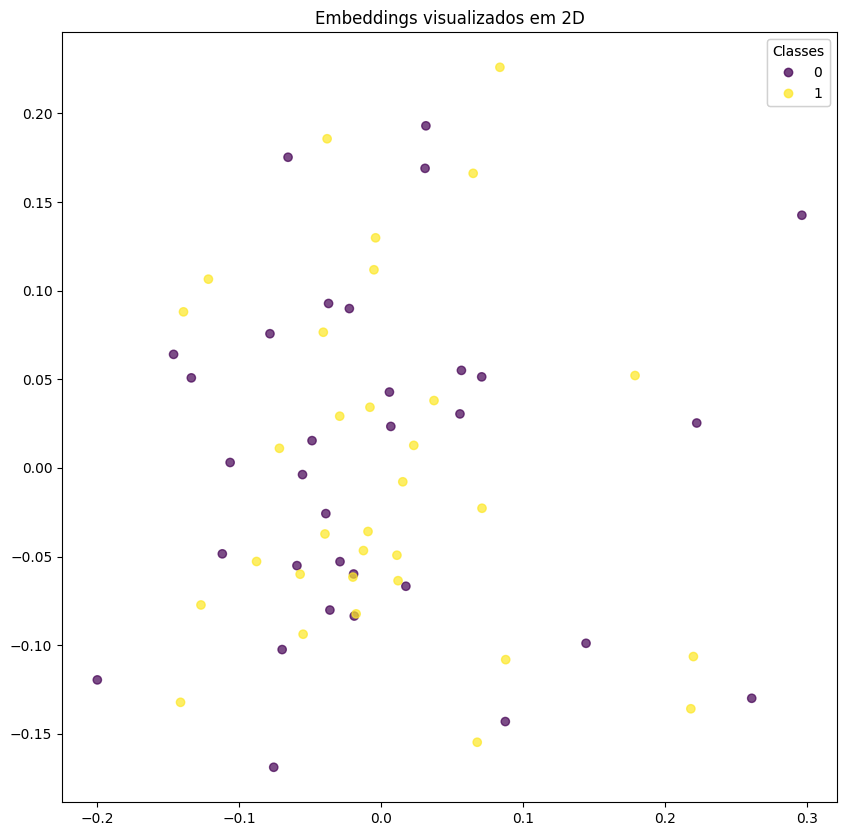

In [77]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Função para plotar os embeddings em 2D
def plot_embeddings(embeddings, labels):
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='viridis', alpha=0.7)
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    ax = plt.gca()  # Obter o objeto Axes atual
    ax.add_artist(legend1)  # Adicionar a legenda ao objeto Axes
    plt.title('Embeddings visualizados em 2D')
    plt.show()

# Obter um lote de imagens do conjunto de dados de teste
data_iter = iter(test_siamese_loader)
data, labels = next(data_iter)  # Corrigido aqui
img1, img2 = data[0].to(device), data[1].to(device)

# Passar as imagens pela rede para obter os embeddings
model.eval()
with torch.no_grad():
    embeddings1 = model(img1)
    embeddings2 = model(img2)

# Converter os embeddings para numpy para visualização
embeddings1_np = embeddings1.cpu().numpy()
embeddings2_np = embeddings2.cpu().numpy()

# Exibir os embeddings de uma das imagens no lote
print("Embeddings da primeira imagem no lote:")
print(embeddings1_np[0])

# Concatenar os embeddings das duas imagens para visualização
all_embeddings = np.concatenate((embeddings1_np, embeddings2_np), axis=0)
# Criar rótulos binários para os embeddings (0 para img1, 1 para img2)
all_labels = np.concatenate((np.zeros(len(embeddings1_np)), np.ones(len(embeddings2_np))), axis=0)

# Reduzir os embeddings para 2D usando PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(all_embeddings)

# Plotar os embeddings em 2D
plot_embeddings(embeddings_2d, all_labels)


In [78]:
len(labels_list)

626

O Que Representam os Rótulos 0 e 1?
No contexto do dataset siamesa:

Rótulo 0: Indica que o par de imagens (img1 e img2) pertencem à mesma classe.
Rótulo 1: Indica que o par de imagens (img1 e img2) pertencem a classes diferentes.
Esses rótulos são binários e são usados para calcular a loss (perda) contrastiva durante o treinamento, que força os embeddings de imagens da mesma classe a ficarem mais próximos no espaço de características e os embeddings de imagens de classes diferentes a ficarem mais distantes.

Visualização dos Embeddings
Quando você visualiza os embeddings usando os rótulos binários, você está essencialmente visualizando se os embeddings das imagens de mesmo rótulo estão mais próximos entre si, mas isso não dá informações sobre as classes originais das imagens.

O dataset SiameseMNISTDataset é responsável por criar pares de imagens e os rótulos correspondentes. No método __getitem__, ele retorna duas imagens (img1 e img2) e um rótulo binário (label) que indica se as imagens pertencem à mesma classe ou não.

In [79]:
from torch.utils.data import Dataset

class SiameseMNISTDataset(Dataset):
    def __init__(self, mnist_dataset):
        self.mnist_dataset = mnist_dataset

    def __getitem__(self, index):
        img1, label1 = self.mnist_dataset[index]
        should_get_same_class = np.random.randint(0, 2)
        if should_get_same_class:
            while True:
                index2 = np.random.randint(0, len(self.mnist_dataset))
                img2, label2 = self.mnist_dataset[index2]
                if label1 == label2:
                    break
        else:
            while True:
                index2 = np.random.randint(0, len(self.mnist_dataset))
                img2, label2 = self.mnist_dataset[index2]
                if label1 != label2:
                    break
        return (img1, img2), torch.from_numpy(np.array([int(label1 != label2)], dtype=np.float32)), (label1, label2)

    def __len__(self):
        return len(self.mnist_dataset)


In [80]:
train_siamese_dataset = SiameseMNISTDataset(train_data)
test_siamese_dataset = SiameseMNISTDataset(test_data)

BATCH_SIZE = 32

train_siamese_loader = DataLoader(train_siamese_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_siamese_loader = DataLoader(test_siamese_dataset, batch_size=BATCH_SIZE, shuffle=False)


Embeddings da primeira imagem no lote:
[ 5.22535294e-02  3.13393474e-02  4.03556041e-02  6.91455081e-02
 -7.74336532e-02 -5.54721057e-03  2.33792700e-02  4.96540777e-02
  1.24475032e-01 -6.81922734e-02  1.32662848e-01 -1.07319556e-01
  7.87284523e-02 -4.62714955e-02 -4.50851843e-02 -5.26777133e-02
  3.17752138e-02  7.95293748e-02 -4.89470959e-02 -5.33669582e-03
 -1.21342681e-01 -2.54754350e-03  7.78724924e-02 -2.67012417e-03
  1.23031892e-01 -7.04094470e-02 -4.82470989e-02 -1.15371324e-01
 -4.53029349e-02 -1.45780910e-02 -4.72407863e-02 -3.07390429e-02
 -5.58981523e-02 -2.10926402e-02 -6.59653842e-02  4.36108653e-03
  1.70278296e-01 -1.04443677e-01 -3.45841274e-02 -4.28304449e-03
 -5.87362647e-02 -6.53220564e-02 -4.29483578e-02 -1.99206918e-02
 -3.04289535e-03  1.11832820e-01  7.32512102e-02  1.25976667e-01
  4.88566458e-02 -9.14724097e-02  6.13820627e-02 -1.54962182e-01
  3.86642888e-02 -1.49924308e-04 -1.16847202e-01 -1.12767331e-01
  4.03979719e-02  8.60625133e-02  2.36743633e-02  4

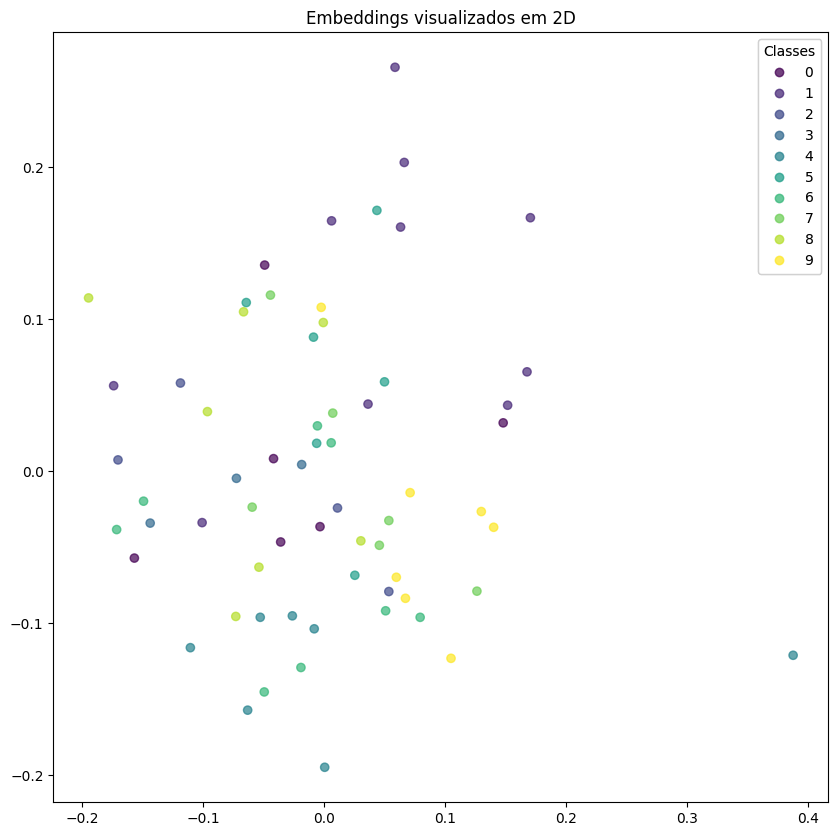

In [81]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Função para plotar os embeddings em 2D
def plot_embeddings(embeddings, labels):
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='viridis', alpha=0.7)
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    ax = plt.gca()  # Obter o objeto Axes atual
    ax.add_artist(legend1)  # Adicionar a legenda ao objeto Axes
    plt.title('Embeddings visualizados em 2D')
    plt.show()

# Obter um lote de imagens do conjunto de dados de teste
data_iter = iter(test_siamese_loader)
data, binary_labels, real_labels = next(data_iter)  # Corrigido aqui
img1, img2 = data[0].to(device), data[1].to(device)
label1, label2 = real_labels[0], real_labels[1]  # Rótulos reais não precisam ser enviados para o dispositivo

# Passar as imagens pela rede para obter os embeddings
model.eval()
with torch.no_grad():
    embeddings1 = model(img1)
    embeddings2 = model(img2)

# Converter os embeddings para numpy para visualização
embeddings1_np = embeddings1.cpu().numpy()
embeddings2_np = embeddings2.cpu().numpy()

# Exibir os embeddings de uma das imagens no lote
print("Embeddings da primeira imagem no lote:")
print(embeddings1_np[0])

# Concatenar os embeddings das duas imagens para visualização
all_embeddings = np.concatenate((embeddings1_np, embeddings2_np), axis=0)
# Usar os rótulos reais para os embeddings
all_labels = np.concatenate((label1.cpu().numpy(), label2.cpu().numpy()), axis=0)

# Reduzir os embeddings para 2D usando PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(all_embeddings)

# Plotar os embeddings em 2D
plot_embeddings(embeddings_2d, all_labels)


embeddings_list = []
labels_list = []

# Adicionar os embeddings e labels à lista
embeddings_list.append(embeddings1_np)
embeddings_list.append(embeddings2_np)
labels_list.append(np.zeros(len(embeddings1_np)))  # 0 para img1
labels_list.append(np.ones(len(embeddings2_np)))   # 1 para img2

# Converter as listas para arrays se desejar (opcional)
embeddings_array = np.concatenate(embeddings_list, axis=0)
labels_array = np.concatenate(labels_list, axis=0)

# Salvar em um arquivo .npz se necessário
np.savez('embeddings_data.npz', embeddings=embeddings_array, labels=labels_array)


In [82]:
# Supondo que embeddings_array e labels_array foram carregados de um arquivo .npz
data = np.load('embeddings_data.npz')
embeddings_array = data['embeddings']
labels_array = data['labels']

# Acessando o primeiro embedding e seu rótulo
first_embedding = embeddings_array[0]
first_label = labels_array[0]

print("Primeiro embedding:")
print(first_embedding)
print("Rótulo correspondente:", first_label)



Primeiro embedding:
[ 5.22535294e-02  3.13393474e-02  4.03556041e-02  6.91455081e-02
 -7.74336532e-02 -5.54721057e-03  2.33792700e-02  4.96540777e-02
  1.24475032e-01 -6.81922734e-02  1.32662848e-01 -1.07319556e-01
  7.87284523e-02 -4.62714955e-02 -4.50851843e-02 -5.26777133e-02
  3.17752138e-02  7.95293748e-02 -4.89470959e-02 -5.33669582e-03
 -1.21342681e-01 -2.54754350e-03  7.78724924e-02 -2.67012417e-03
  1.23031892e-01 -7.04094470e-02 -4.82470989e-02 -1.15371324e-01
 -4.53029349e-02 -1.45780910e-02 -4.72407863e-02 -3.07390429e-02
 -5.58981523e-02 -2.10926402e-02 -6.59653842e-02  4.36108653e-03
  1.70278296e-01 -1.04443677e-01 -3.45841274e-02 -4.28304449e-03
 -5.87362647e-02 -6.53220564e-02 -4.29483578e-02 -1.99206918e-02
 -3.04289535e-03  1.11832820e-01  7.32512102e-02  1.25976667e-01
  4.88566458e-02 -9.14724097e-02  6.13820627e-02 -1.54962182e-01
  3.86642888e-02 -1.49924308e-04 -1.16847202e-01 -1.12767331e-01
  4.03979719e-02  8.60625133e-02  2.36743633e-02  4.57547158e-02
 -8.9

In [83]:
# Acessando o segundo embedding e seu rótulo
second_embedding = embeddings_array[1]
second_label = labels_array[1]

print("\nSegundo embedding:")
print(second_embedding)
print("Rótulo correspondente:", second_label)


Segundo embedding:
[ 0.08653212 -0.01527599  0.08806089  0.04837947 -0.03922262 -0.07493235
  0.02599791  0.07604338  0.17667152 -0.01484426  0.09242028 -0.04515549
  0.1517308  -0.04687075 -0.09164543 -0.07320146  0.06449696  0.15430719
 -0.00348452 -0.00178755 -0.18928018 -0.05146034  0.15409163  0.05273078
  0.05076232 -0.10414764 -0.05659762 -0.08950407 -0.02993712 -0.07003566
 -0.04652619 -0.03614376 -0.1055509  -0.09791723 -0.06617431 -0.03046354
  0.12054259 -0.11511972  0.00459997  0.02464993  0.01275971 -0.07548615
  0.02588421  0.00688203  0.05673805  0.07064993  0.03198607  0.05705415
 -0.00786427 -0.08494022  0.02099561 -0.15169972 -0.03173482  0.00157771
 -0.17916794 -0.12460732  0.0530146   0.10059074  0.05526625  0.06315436
 -0.05316994 -0.07048924  0.03968374  0.03587072  0.052744   -0.0330637
  0.0108133   0.0387821   0.02168425  0.08372923  0.03364954  0.18738662
 -0.05160572  0.13139835 -0.06010348  0.02727898 -0.07351077  0.0482584
 -0.02648106 -0.12919703 -0.03155

In [84]:
# Acessando um conjunto de embeddings e seus rótulos
indices = [0, 1, 2]  # Exemplo de índices para acessar múltiplos embeddings
selected_embeddings = embeddings_array[indices]
selected_labels = labels_array[indices]

print("\nSeleção de embeddings:")
print(selected_embeddings)
print("Rótulos correspondentes:", selected_labels)


Seleção de embeddings:
[[ 5.22535294e-02  3.13393474e-02  4.03556041e-02  6.91455081e-02
  -7.74336532e-02 -5.54721057e-03  2.33792700e-02  4.96540777e-02
   1.24475032e-01 -6.81922734e-02  1.32662848e-01 -1.07319556e-01
   7.87284523e-02 -4.62714955e-02 -4.50851843e-02 -5.26777133e-02
   3.17752138e-02  7.95293748e-02 -4.89470959e-02 -5.33669582e-03
  -1.21342681e-01 -2.54754350e-03  7.78724924e-02 -2.67012417e-03
   1.23031892e-01 -7.04094470e-02 -4.82470989e-02 -1.15371324e-01
  -4.53029349e-02 -1.45780910e-02 -4.72407863e-02 -3.07390429e-02
  -5.58981523e-02 -2.10926402e-02 -6.59653842e-02  4.36108653e-03
   1.70278296e-01 -1.04443677e-01 -3.45841274e-02 -4.28304449e-03
  -5.87362647e-02 -6.53220564e-02 -4.29483578e-02 -1.99206918e-02
  -3.04289535e-03  1.11832820e-01  7.32512102e-02  1.25976667e-01
   4.88566458e-02 -9.14724097e-02  6.13820627e-02 -1.54962182e-01
   3.86642888e-02 -1.49924308e-04 -1.16847202e-01 -1.12767331e-01
   4.03979719e-02  8.60625133e-02  2.36743633e-02  4

In [85]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Função para plotar os embeddings em 2D
def plot_embeddings(embeddings, labels):
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='viridis', alpha=0.7)
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    ax = plt.gca()  # Obter o objeto Axes atual
    ax.add_artist(legend1)  # Adicionar a legenda ao objeto Axes
    plt.title('Embeddings visualizados em 2D')
    plt.show()

# Obter um lote de imagens do conjunto de dados de teste
data_iter = iter(test_siamese_loader)
data, labels = next(data_iter)  # Corrigido aqui
img1, img2 = data[0].to(device), data[1].to(device)

# Passar as imagens pela rede para obter os embeddings
model.eval()
with torch.no_grad():
    embeddings1 = model(img1)
    embeddings2 = model(img2)

# Converter os embeddings para numpy para visualização
embeddings1_np = embeddings1.cpu().numpy()
embeddings2_np = embeddings2.cpu().numpy()

# Concatenar os embeddings das duas imagens para visualização
all_embeddings = np.concatenate((embeddings1_np, embeddings2_np), axis=0)
# Criar rótulos binários para os embeddings (0 para img1, 1 para img2)
all_labels = np.concatenate((np.zeros(len(embeddings1_np)), np.ones(len(embeddings2_np))), axis=0)

# Reduzir os embeddings para 2D usando PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(all_embeddings)

# Plotar os embeddings em 2D
plot_embeddings(embeddings_2d, all_labels)

# Salvar os embeddings em uma estrutura de dados para uso futuro
# Exemplo: salvar em uma lista de embeddings e uma lista de labels
embeddings_list = []
labels_list = []

# Adicionar os embeddings e labels à lista
embeddings_list.append(embeddings1_np)
embeddings_list.append(embeddings2_np)
labels_list.append(np.zeros(len(embeddings1_np)))  # 0 para img1
labels_list.append(np.ones(len(embeddings2_np)))   # 1 para img2

# Converter as listas para arrays se desejar (opcional)
embeddings_array = np.concatenate(embeddings_list, axis=0)
labels_array = np.concatenate(labels_list, axis=0)

# Salvar em um arquivo .npz se necessário
np.savez('embeddings_data.npz', embeddings=embeddings_array, labels=labels_array)


ValueError: too many values to unpack (expected 2)

In [86]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# Caminho para a imagem local
image_path = '/content/Imagem.jpg'

# Abrir a imagem local
new_image = Image.open(image_path).convert("L")  # Convertendo para grayscale

# Exibir a imagem
plt.imshow(new_image, cmap="gray")
plt.show()

# Transformação usada para o dataset FashionMNIST
transform = transforms.Compose([transforms.Resize((28, 28)),
                                transforms.ToTensor()])

# Aplicar a transformação
new_image_tensor = transform(new_image)

# Exibir a imagem transformada
plt.imshow(new_image_tensor.squeeze(), cmap="gray")
plt.show()






def get_embedding(model, image, device):
    model.eval()
    with torch.no_grad():
        image = image.unsqueeze(0).to(device)  # Adiciona uma dimensão de batch e envia para o dispositivo
        embedding = model(image).cpu().numpy()
    return embedding

# Obter o embedding da nova imagem
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
new_embedding = get_embedding(model, new_image_tensor, device)

# Suponha que você tenha um banco de dados de embeddings e rótulos
# Aqui você deve ter previamente calculado e armazenado os embeddings do dataset FashionMNIST
# embeddings_database = ...
# labels_database = ...

# Calcular a distância euclidiana entre o novo embedding e os embeddings do banco de dados
distances = np.linalg.norm(embeddings_database - new_embedding, axis=1)

# Encontrar o índice da menor distância
closest_index = np.argmin(distances)

# Obter o rótulo da imagem mais próxima
closest_label = labels_database[closest_index]

print(f'A nova imagem foi identificada como: {closest_label}')







# Exemplo de como obter o embedding da nova imagem usando seu modelo treinado
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
new_image_tensor = new_image_tensor.unsqueeze(0).to(device)  # Adiciona dimensão de batch e envia para dispositivo

# Suponha que 'model' seja a instância da sua rede treinada
model.eval()
with torch.no_grad():
    new_embedding = model(new_image_tensor).cpu().numpy()

# Exibir o embedding
print("Embedding da nova imagem:", new_embedding)


FileNotFoundError: [Errno 2] No such file or directory: '/content/Imagem.jpg'